In [1]:
import measurements
from measurements import *

In [2]:
#variables
field_name ='M00'
start=-50*10**(-3)
stop=50*10**(-3)
step=10**(-3)
comp=10
distances=(5,10,15,25,45)
time='MED'
innen=0

In [3]:
#connect to the device
device = module.HP4155a('GPIB0::17::INSTR')
date = str(datetime.today().replace(microsecond=0))

In [4]:
device.error()

'+0,"No error"\n'

Text(0.5, 1.0, 'CTLM plot')

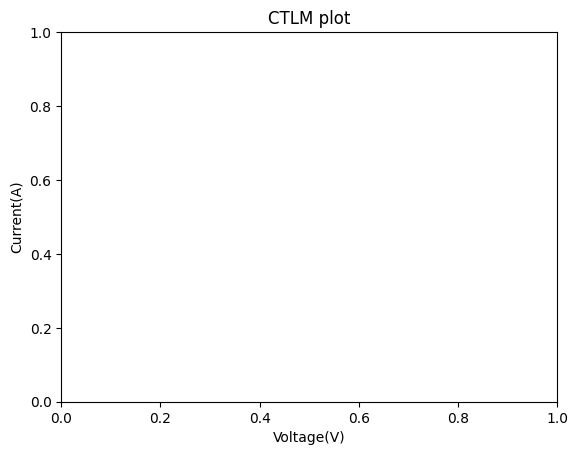

In [5]:
#initilize figure
plt.figure()
plt.xlabel('Voltage(V)')
plt.ylabel('Current(A)')
plt.title("CTLM plot")

In [6]:
 #setup
device.reset()
device.inst.write(":PAGE:MEAS")
device.inst.write(":PAGE:CHAN:MODE SWEEP") #go to sweep page and prepare sweep measurement

23

In [7]:
device.disable_vsu(1)
device.disable_vsu(2)

In [8]:
device.disable_vmu(1)
device.disable_vmu(2)

In [9]:
#smu1 is constant and common
device.smu_mode_meas(1,'COMM')
device.smu_function_sweep(1,'CONS')
    
#smu2 is constant and I
device.smu_mode_meas(2,'I')
device.smu_function_sweep(2,'CONS')
device.cons_smu_value(2,0)
    
#smu3 is var1 and I
device.smu_mode_meas(3,'I')
device.smu_function_sweep(3,'VAR1')
    
#smu4 is constant and I
device.smu_mode_meas(4,'I')
device.smu_function_sweep(4,'CONS')
device.cons_smu_value(4,0)
    
#select compliance of smu3
device.comp('VAR1',comp)
    
#compliance of smu2 and smu4 is 10V
device.const_comp(2,10)
device.const_comp(4,10)

In [10]:
device.user_function('I','A','I3')
print(device.error())
device.user_function('V','V','V4-V2')
print(device.error())
device.user_function('R','OHM','V/I')
print(device.error())
device.user_function('VS','V','V3')
print(device.error())

+0,"No error"

+0,"No error"

+0,"No error"

+0,"No error"



In [11]:
#integration time
device.integration_time(time)

In [12]:
    
#define start-step-stop
device.start_value_sweep(start)
device.step_sweep(step)
device.stop_value_sweep(stop)

In [13]:
#display variables
device.display_variable('X','V')
print(device.error())
device.display_variable('Y1','I')
print(device.error())
device.display_variable('Y2','R')
print(device.error())

+0,"No error"

+0,"No error"

+0,"No error"



In [14]:
device.display_variable_min_max('X','MIN',-10)
device.display_variable_min_max('X','MAX',10)
device.display_variable_min_max('Y1','MIN',start)
device.display_variable_min_max('Y1','MAX',stop)
device.display_variable_min_max('Y2','MIN',0)
device.display_variable_min_max('Y2','MAX',200)

In [15]:
 #start measurement
device.single_measurement()
while device.operation_completed() == False:
        pass

In [22]:
v=device.return_data('V')
v3=device.return_data('VS')
i=device.return_data('I')
r=device.return_data('R')
print(r)
r[50]=float('NaN')
print(v3)
print(v)
print(i)

[199.0687, 203.1307, 207.3624, 211.7744, 216.3797, 221.1893, 226.2174, 231.4787, 236.9896, 242.7693, 248.838, 255.2181, 261.9341, 269.0141, 276.4874, 284.3889, 292.7551, 301.6264, 311.0509, 321.0848, 331.7863, 343.2259, 355.4841, 368.6504, 382.8311, 398.1461, 414.7365, 432.7694, 452.4416, 473.9852, 491.4541, 488.2188, 485.5548, 482.6365, 480.0089, 477.8993, 475.462, 473.3512, 471.7728, 469.9153, 468.2796, 467.1869, 465.7367, 465.1277, 463.9013, 462.756, 462.8145, 461.8933, 460.749, 462.548, -9.9e+307, 459.826, 459.255, 460.9573, 462.064, 462.1692, 463.4757, 464.6631, 465.969, 466.9178, 468.4606, 470.2536, 471.66, 473.7292, 475.982, 478.0425, 480.7104, 483.5262, 486.6198, 489.6606, 493.1878, 473.9649, 452.4223, 432.7527, 414.7214, 398.1343, 382.8215, 368.6438, 355.4759, 343.2188, 331.7775, 321.0737, 311.0401, 301.6142, 292.7427, 284.3794, 276.4811, 269.0093, 261.9302, 255.2141, 248.8343, 242.7657, 236.9855, 231.4752, 226.2149, 221.1874, 216.3789, 211.7756, 207.3632, 203.1304, 199.0674]


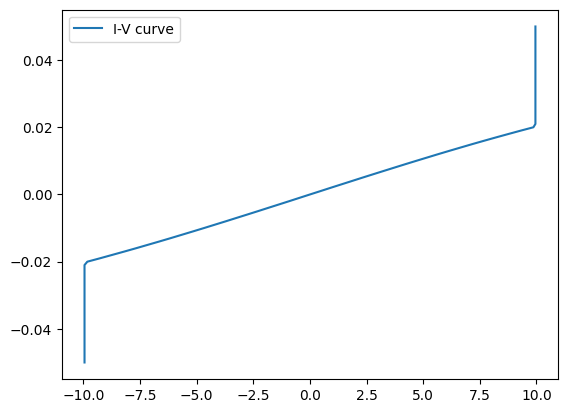

In [17]:
plt.plot(v,i,label='I-V curve')
plt.legend()

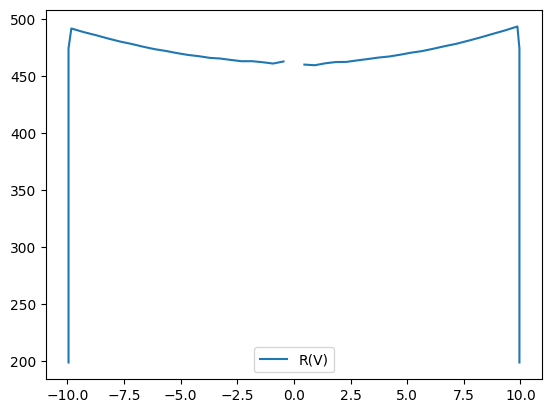

In [23]:
plt.figure()
plt.plot(v,r,label='R(V)')
plt.legend()

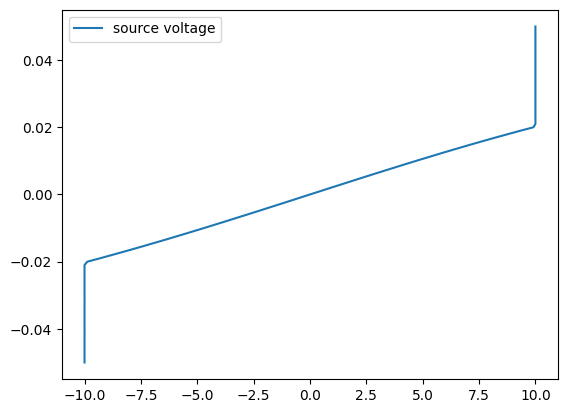

In [19]:
plt.figure()
plt.plot(v3,i,label='source voltage')
plt.legend()